# how_to_plot_living_room_temperature_in_Building_1

This notebook shows how to combine the data in the xml file and the csv file to plot the living room internal air temperature in Building 1.

## Import packages

In [1]:
from lxml import etree
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Setup data folder

This is the folder where the xml file and csv file are stored. This can be modified as needed.

In [2]:
data_folder=r'C:\Users\cvskf\OneDrive - Loughborough University\_Data\REFIT_Smart_Home_dataset_PUBLIC_v1\Data'

## Read the xml file

Parses the refitXML file into an lxml etree variable

In [3]:
xml_fn=r'REFIT_BUILDING_SURVEY.xml'
tree=etree.parse(os.path.join(data_folder,xml_fn))

## Read the csv file

In [4]:
csv_fn=r'REFIT_TIME_SERIES_VALUES.csv' 
df=pd.read_csv(os.path.join(data_folder,csv_fn))
df.head()

,TimeSeriesVariable/@id,dateTime,data
0,TimeSeriesVariable1,2013-10-02T05:00:00Z,17.772
1,TimeSeriesVariable1,2013-10-02T05:30:00Z,18.081
2,TimeSeriesVariable1,2013-10-02T06:00:00Z,18.176
3,TimeSeriesVariable1,2013-10-02T06:30:00Z,18.176
4,TimeSeriesVariable1,2013-10-02T07:00:00Z,18.105


## Get Building 1 element

In [5]:
NS={'a':'http://www.refitsmarthomes.org'}
b=tree.xpath('/a:RefitXML/a:Stock/a:Building[@id="Building01"]',namespaces=NS)[0]
b

<Element {http://www.refitsmarthomes.org}Building at 0x11b7012fc48>

## Get living room element

In [6]:
lr=b.xpath('./a:Space[@roomType="Living room"]',namespaces=NS)[0]
lr

<Element {http://www.refitsmarthomes.org}Space at 0x11b3bb2a8c8>

## Get TimeSeriesVariables which measured air temperature

In [7]:
tsvs=lr.xpath('./a:Sensor/a:TimeSeriesVariable[@variableType="Air temperature"]',namespaces=NS)
tsvs

[<Element {http://www.refitsmarthomes.org}TimeSeriesVariable at 0x11b3bb2a608>,
 <Element {http://www.refitsmarthomes.org}TimeSeriesVariable at 0x11b3bb2aa48>,
 <Element {http://www.refitsmarthomes.org}TimeSeriesVariable at 0x11b3bb2a6c8>,
 <Element {http://www.refitsmarthomes.org}TimeSeriesVariable at 0x11b3bb2a7c8>]

## Get TimeSeriesVariables ids

In [8]:
tsv_ids=[tsv.get('id') for tsv in tsvs]
tsv_ids

['TimeSeriesVariable37',
 'TimeSeriesVariable38',
 'TimeSeriesVariable39',
 'TimeSeriesVariable40']

## Get measurements from csv file

In [9]:
result=df[df['TimeSeriesVariable/@id'].isin(tsv_ids)].copy()
print('number of measurments:',len(result))
result.head()

number of measurments: 40612


,TimeSeriesVariable/@id,dateTime,data
501762,TimeSeriesVariable37,2013-10-02T05:00:00Z,19.865
501763,TimeSeriesVariable37,2013-10-02T05:30:00Z,19.817
501764,TimeSeriesVariable37,2013-10-02T06:00:00Z,19.793
501765,TimeSeriesVariable37,2013-10-02T06:30:00Z,19.793
501766,TimeSeriesVariable37,2013-10-02T07:00:00Z,19.674


## Format results

In [10]:
result2=result.set_index('dateTime')
result2.index=pd.to_datetime(result2.index)
result2=result2.sort_index()
result2.head()

,TimeSeriesVariable/@id,data
dateTime,,
2013-10-02 05:00:00+00:00,TimeSeriesVariable37,19.865
2013-10-02 05:30:00+00:00,TimeSeriesVariable37,19.817
2013-10-02 06:00:00+00:00,TimeSeriesVariable37,19.793
2013-10-02 06:30:00+00:00,TimeSeriesVariable37,19.793
2013-10-02 07:00:00+00:00,TimeSeriesVariable37,19.674


## Plot measurements

Figure X: Internal air temperatures in the living room of Building 01 as measured by Hobo Onset sensors


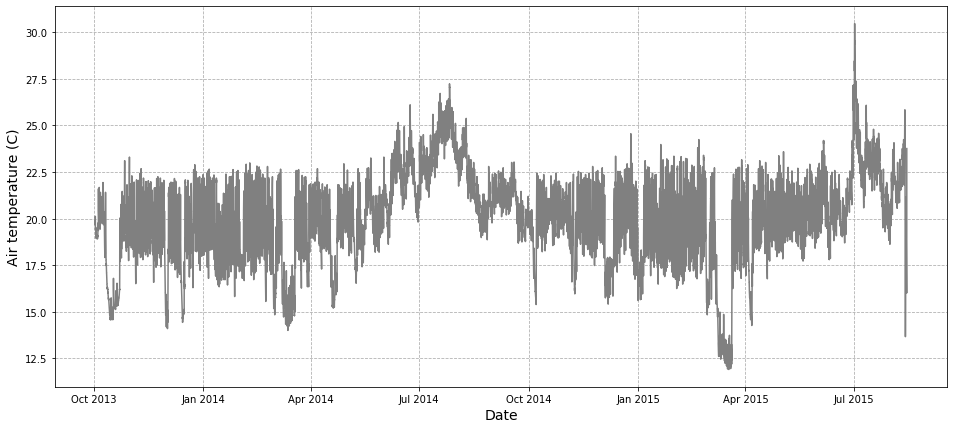

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 7))
ax.plot(result2['data'],color='grey')
myFmt = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(myFmt)
ax.grid(linestyle='--')
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Air temperature (C)',fontsize=14)
print('Figure X: Internal air temperatures in the living room of Building 01 as measured by Hobo Onset sensors')

## Save plot

In [12]:
fig.savefig('how_to_plot_living_room_temperature_in_Building_1.png',bbox_inches='tight', pad_inches=0.25)